# 아트 장르 트레인 통일

# 이미지 흑백

In [1]:


import tensorflow as tf


gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)


sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [2]:
import os
import numpy as np
import shutil

original_dataset_dir = 'C:\\Users\\Affinity\\Downloads\\best-artworks-of-all-time\\images\\images\\'

validation_dir = 'C:\\Users\\Affinity\\Documents\\img\\art\\art_genre_img\\validation'

test_dir = 'C:\\Users\\Affinity\\Documents\\img\\art\\art_genre_img\\test'

train_dir = 'C:\\Users\\Affinity\\Documents\\img\\art\\art_genre_img\\train2'

l = os.listdir(original_dataset_dir)



In [3]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)



train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)


Found 1200 images belonging to 6 classes.
Found 480 images belonging to 6 classes.
Found 480 images belonging to 6 classes.


In [ ]:
l2 = os.listdir(train_dir)
l2

In [ ]:
# import random


# for i in l2:
#     l_genre = os.listdir(train_dir + '/' + i)
#     random.shuffle(l_genre)
#     os.mkdir(train_dir + '/' + i + '2')
#     for j in range(200):
#         fname = l_genre[j]
#         src = os.path.join(train_dir + '/' + i, fname)
#         dst = os.path.join(train_dir + '/' + i + '2', fname)
#         shutil.copyfile(src, dst)
    

In [4]:
import numpy as np

from keras.preprocessing.image import ImageDataGenerator

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))




datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count, 6))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 8000)
validation_features, validation_labels = extract_features(validation_dir, 4000)
test_features, test_labels = extract_features(test_dir, 4000)

train_features = np.reshape(train_features, (8000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (4000, 4 * 4 * 512))
test_features = np.reshape(test_features, (4000, 4 * 4 * 512))




Instructions for updating:
Colocations handled automatically by placer.
Found 1200 images belonging to 6 classes.
Found 480 images belonging to 6 classes.
Found 480 images belonging to 6 classes.


In [5]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=50,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 8000 samples, validate on 4000 samples
Epoch 1/50
8000/8000 [==============================] - 4s 544us/step - loss: 1.7108 - acc: 0.2979 - val_loss: 1.6110 - val_acc: 0.3583
Epoch 2/50
8000/8000 [==============================] - 4s 453us/step - loss: 1.4411 - acc: 0.4328 - val_loss: 1.5684 - val_acc: 0.3583
Epoch 3/50
8000/8000 [==============================] - 4s 460us/step - loss: 1.3337 - acc: 0.4879 - val_loss: 1.5574 - val_acc: 0.3680
Epoch 4/50
8000/8000 [==============================] - 4s 452us/step - loss: 1.2590 - acc: 0.5271 - val_loss: 1.5247 - val_acc: 0.3820
Epoch 5/50
8000/8000 [==============================] - 4s 471us/step - loss: 1.1891 - acc: 0.5475 - val_loss: 1.5111 - val_acc: 0.3935
Epoch 6/50
8000/8000 [==============================] - 4s 469us/step - loss: 1.1424 - acc: 0.5704 - val_loss

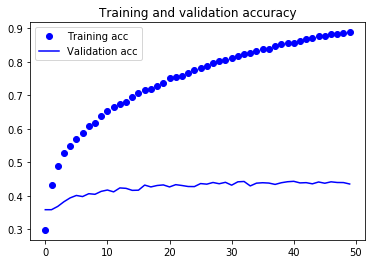

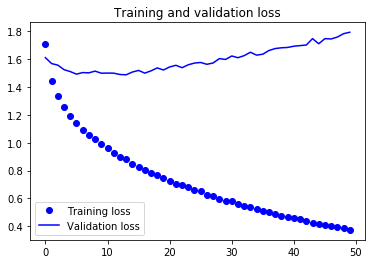

In [7]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# import keras

# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# from keras.optimizers import Adam

# from keras.applications import VGG16

# conv_base = VGG16(weights='imagenet',
#                  include_top=False,
#                  input_shape=(100, 100, 3))

# model = Sequential()
# model.add(conv_base)
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(6, activation='softmax'))

# adam = Adam()

# model.compile(loss='categorical_crossentropy',
#              optimizer=adam,
#              metrics=['acc'])


# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch=100,
#     epochs=300,
#     validation_data=validation_generator,
#     validation_steps=150
# )


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu',
         input_shape=(150, 150, 3)))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=25
)



Epoch 1/20
50/50 [==============================] - 24s 488ms/step - loss: 2.0312 - acc: 0.1980 - val_loss: 1.7824 - val_acc: 0.2680
Epoch 2/20
50/50 [==============================] - 23s 454ms/step - loss: 1.6573 - acc: 0.2960 - val_loss: 1.7119 - val_acc: 0.2280
Epoch 3/20
50/50 [==============================] - 24s 487ms/step - loss: 1.5122 - acc: 0.3530 - val_loss: 1.7075 - val_acc: 0.2880
Epoch 4/20
50/50 [==============================] - 25s 504ms/step - loss: 1.5383 - acc: 0.3460 - val_loss: 1.7022 - val_acc: 0.2500
Epoch 5/20
50/50 [==============================] - 26s 514ms/step - loss: 1.5348 - acc: 0.3510 - val_loss: 1.6906 - val_acc: 0.3240
Epoch 6/20
50/50 [==============================] - 26s 511ms/step - loss: 1.4604 - acc: 0.3920 - val_loss: 1.6464 - val_acc: 0.3340
Epoch 7/20
50/50 [==============================] - 26s 512ms/step - loss: 1.4788 - acc: 0.4120 - val_loss: 1.6954 - val_acc: 0.2580
Epoch 8/20
50/50 [==============================] - 25s 502ms/step - 

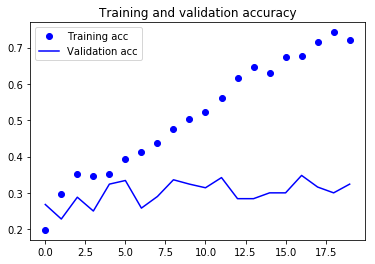

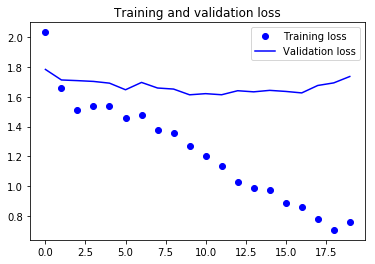

In [10]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()